# Dependencies

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Logistic Regression
<div style="display: flex; margin-top: 50px;">
    <div style="width: 20%;">
        <table style="margin-left: auto; margin-right: auto;">
            <caption>Dataset</caption>
            <tr>
                <th>#</th>
                <th><span style="color: cyan;">x<sub>1</span></th>
                <th><span style="color: #FF9999;">y</span></th>
            </tr>
            <tr>
                <th><span style="color: #99DD00">1</span></th>
                <td>1</td>
                <td>0</td>
            </tr>
            <tr>
                <th><span style="color: #99DD00">2</span></th>
                <td>2</td>
                <td>0</td>
            </tr>
            <tr>
                <th><span style="color: #99DD00">3</span></th>
                <td>3</td>
                <td>0</td>
            </tr>
            <tr>
                <th><span style="color: #99DD00">4</span></th>
                <td>4</td>
                <td>1</td>
            </tr>
            <tr>
                <th><span style="color: #99DD00">5</span></th>
                <td>5</td>
                <td>1</td>
            </tr>
            <tr>
                <th><span style="color: #99DD00">6</span></th>
                <td>6</td>
                <td>1</td>
            </tr>
        </table>
    </div>
    <div style="width: 80%;">
        <img src="./resources/images/logistic-regression.svg" alt="Your Image" style="width: 100%;">
    </div>
</div>

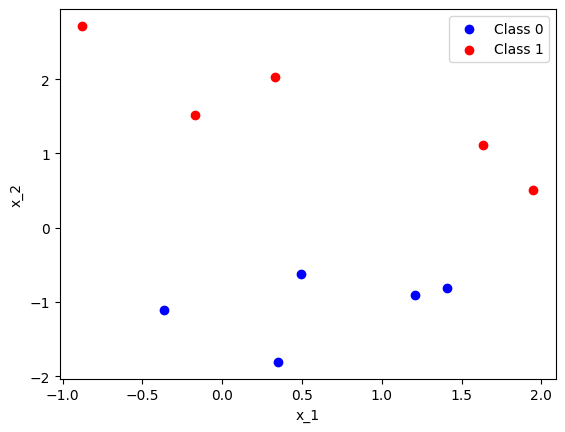

In [10]:
# generate artificial data
n_samples, n_features = 10, 2

x, y = datasets.make_classification(
    n_samples= n_samples,
    n_features= n_features,
    n_informative= 2,
    n_redundant= 0,
    n_clusters_per_class= 1,
    random_state= 42
)

# convert numpy.ndarray to torch.Tensor
x_train = torch.from_numpy(x.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32)).view(-1, 1)

# plot
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color= 'b', label= 'Class 0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color= 'r', label= 'Class 1')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.show()

In [11]:
# logistic regression model
model = torch.nn.Sequential(
    torch.nn.Linear(n_features, 1),
    torch.nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [13]:
# plot stuff
state = []

In [14]:
# initial weights [educational purpose]
with torch.no_grad():
    # b [w_0] = +1
    model[0].bias[0].fill_(1)

    # w_1 = -1
    model[0].weight[0, 0].fill_(-1)

    # w_2 = +1
    model[0].weight[0, 1].fill_(1)

# hyper parameters
epoch = 6
lr = .5
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= lr)

# training loop
model.train()
for i in range(epoch):

    # forward
    y_pred = model(x_train)

    # backward
    loss = criterion(y_pred, y_train)
    loss.backward()

    # save new y_pred every 5 epochs [plot stuff]
    state.append([model[0].weight.clone().detach().numpy(), model[0].bias.clone().detach().numpy()])

    # update parameters
    optimizer.step()
    optimizer.zero_grad()

    # log
    print(f"epoch: {i} -> loss: {loss.item():>7.5f}")

epoch: 0 -> loss: 0.38442
epoch: 1 -> loss: 0.34141
epoch: 2 -> loss: 0.30671
epoch: 3 -> loss: 0.27825
epoch: 4 -> loss: 0.25456
epoch: 5 -> loss: 0.23458


In [ ]:
# plot
fig, axs = plt.subplots(nrows= 3, ncols= 2, figsize= (12, 16), layout= 'compressed')

for row in range(3):
    for col in range(2):
        axs[row, col].scatter(x[y == 0][:, 0], x[y == 0][:, 1], color= 'b', label= 'Class 0')
        axs[row, col].scatter(x[y == 1][:, 0], x[y == 1][:, 1], color= 'r', label= 'Class 1')
        axs[row, col].set(title= f"epoch {row * 2 + col}, W: {state[row * 2 + col][0].squeeze()}, b: {state[row * 2 + col][1].squeeze():.3f}", xlim= (x[:, 0].min() - 1, x[:, 0].max() + 1), ylim= (x[:, 1].min() - 1, x[:, 1].max() + 1))

        # decision boundary
        w, b = state[row * 2 + col]
        slope = -w[0][0] / w[0][1]
        intercept = -b[0] / w[0][1]
        x_plot = np.array([np.min(x[:, 0]), np.max(x[:, 0])])
        y_plot = slope * x_plot + intercept

        axs[row, col].plot(x_plot, y_plot, color='g', linestyle='--', label='Decision Boundary')
        axs[row, col].legend()

plt.show()